In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

Files already downloaded and verified


In [ ]:
image, _ = trainset[0]
print (image)

tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

        [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
         [-0.8431, -1.0000, -1.0000,  ..., -0

In [ ]:
batch_size = 4

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

In [ ]:
for images, labels in trainloader:
  print (images.shape)
  print (labels)
  break

torch.Size([4, 3, 32, 32])
tensor([9, 6, 2, 9])


In [ ]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


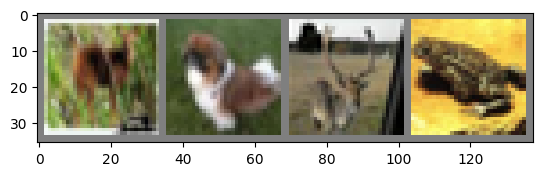

deer
dog
deer
frog


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(classes[labels[0]])
print (classes[labels[1]])
print (classes[labels[2]])
print (classes[labels[3]])

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.conv4 = nn.Conv2d(64, 64, 3)
        self.fc1 = nn.Linear(64 * 5 * 5, 50)
        self.fc2 = nn.Linear(50, 20)
        self.fc3 = nn.Linear(20, 10)

    def forward (self, x):
      x = self.pool(F.relu(self.conv2(self.conv1(x))))
      x = self.pool(F.relu(self.conv4(self.conv3(x))))
      x = torch.flatten(x, 1)
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x =self.fc3(x)
      return x
net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):  # making it run for 2 epochs

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a tuple of (inputs, labels)
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1, 2000] loss: 2.294
[1, 4000] loss: 2.063
[1, 6000] loss: 1.782
[1, 8000] loss: 1.581
[1, 10000] loss: 1.476
[1, 12000] loss: 1.408
[2, 2000] loss: 1.281
[2, 4000] loss: 1.239
[2, 6000] loss: 1.187
[2, 8000] loss: 1.147
[2, 10000] loss: 1.123
[2, 12000] loss: 1.049
Finished Training


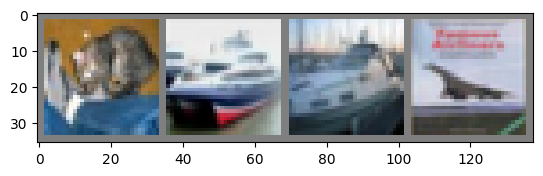

Groundtruth values are:
cat
ship
ship
plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print ('Groundtruth values are:')
for i in range (4):
  print (classes[labels[i]])

In [ ]:
outputs = net(images)

In [ ]:
print (outputs)

tensor([[-1.4693, -0.3129,  1.1783,  2.6152,  0.5101,  0.3969,  2.2656, -1.9999,
          3.5832, -1.0784],
        [ 2.7743,  5.1344, -1.5317, -2.7310, -2.5340, -3.4395, -2.0088, -4.9763,
          9.6185,  2.1609],
        [ 1.3923,  1.7439, -0.9154, -0.4523, -0.9050, -1.9884, -0.8077, -2.5477,
          4.3320,  2.3121],
        [ 2.7032, -0.1842,  0.5089, -0.8131, -0.1203, -1.7791, -1.7778, -1.6931,
          3.4446, -0.4326]], grad_fn=<AddmmBackward0>)


In [ ]:
_, indices = torch.max(outputs, 1)
print (indices)
indices = list(indices)

tensor([8, 8, 8, 8])


In [ ]:
print ('predictions are:')
for i in range (4):
    print (f"{i}) : {classes[indices[i]]}")

predictions are:
0) : ship
1) : ship
2) : ship
3) : ship


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 63 %
